
Dataset with Interaction Term:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  age_thalach_interaction  
0   0     1       1                     9450  
1   0     2       1                     6919  
2   0     2       1                     7052  
3   0     2       1                     9968  
4   0     2       1                     9291  
First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37

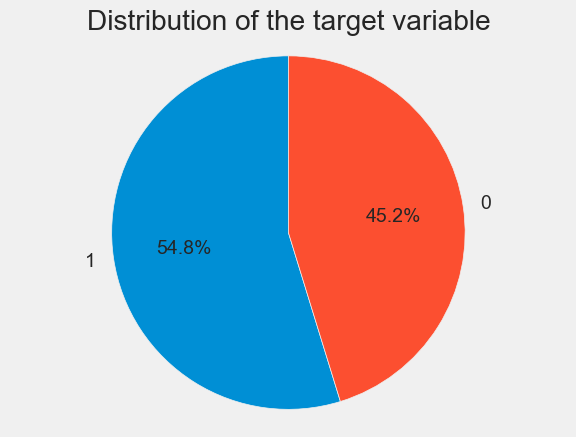


Missing values in the dataset:
age                        0
sex                        0
cp                         0
trestbps                   0
chol                       0
fbs                        0
restecg                    0
thalach                    0
exang                      0
oldpeak                    0
slope                      0
ca                         0
thal                       0
target                     0
age_thalach_interaction    0
dtype: int64


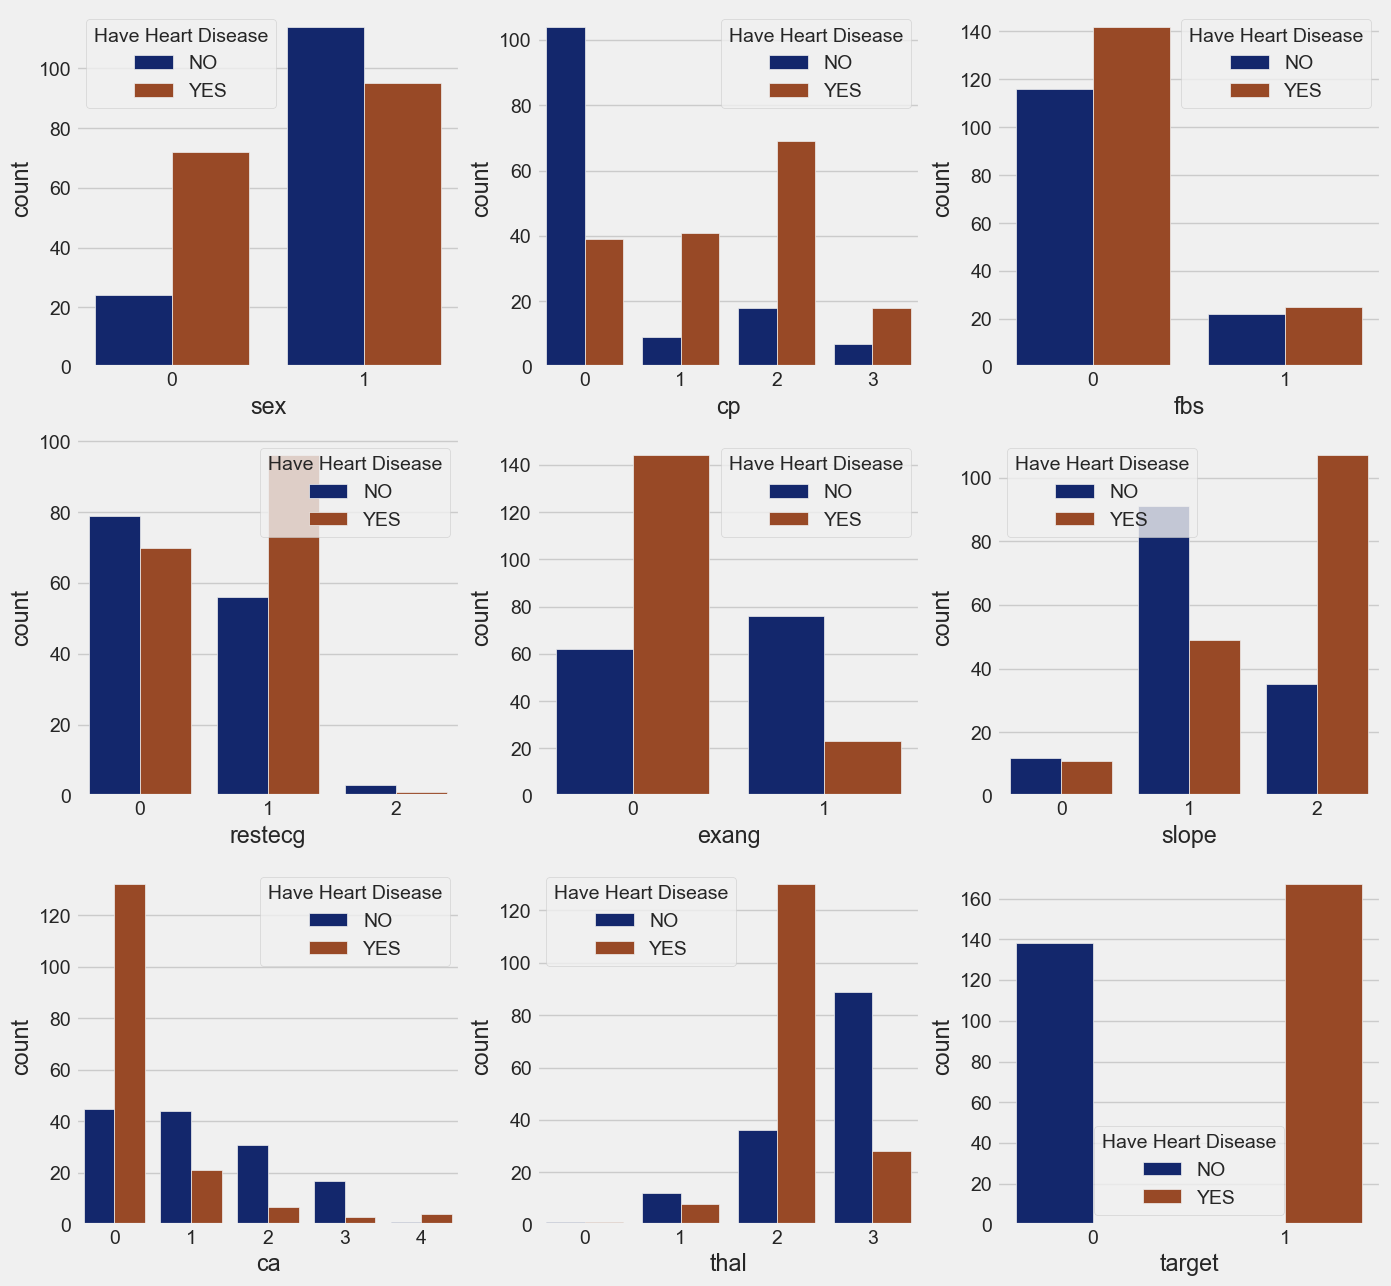

C:\Users\pawan\AppData\Local\Temp\ipykernel_22016\2026439959.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='target', y=column, ci=None, palette='dark', saturation=0.7)
C:\Users\pawan\AppData\Local\Temp\ipykernel_22016\2026439959.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='target', y=column, ci=None, palette='dark', saturation=0.7)
C:\Users\pawan\AppData\Local\Temp\ipykernel_22016\2026439959.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='target', y=column, ci=None, palette='dark', saturation=0.7)
C:\Users\pawan\AppData\Local\Temp\ipykernel_22016\2026439959.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='target', y=column, ci=None, palette='dark', saturation=0.7)
C:\U

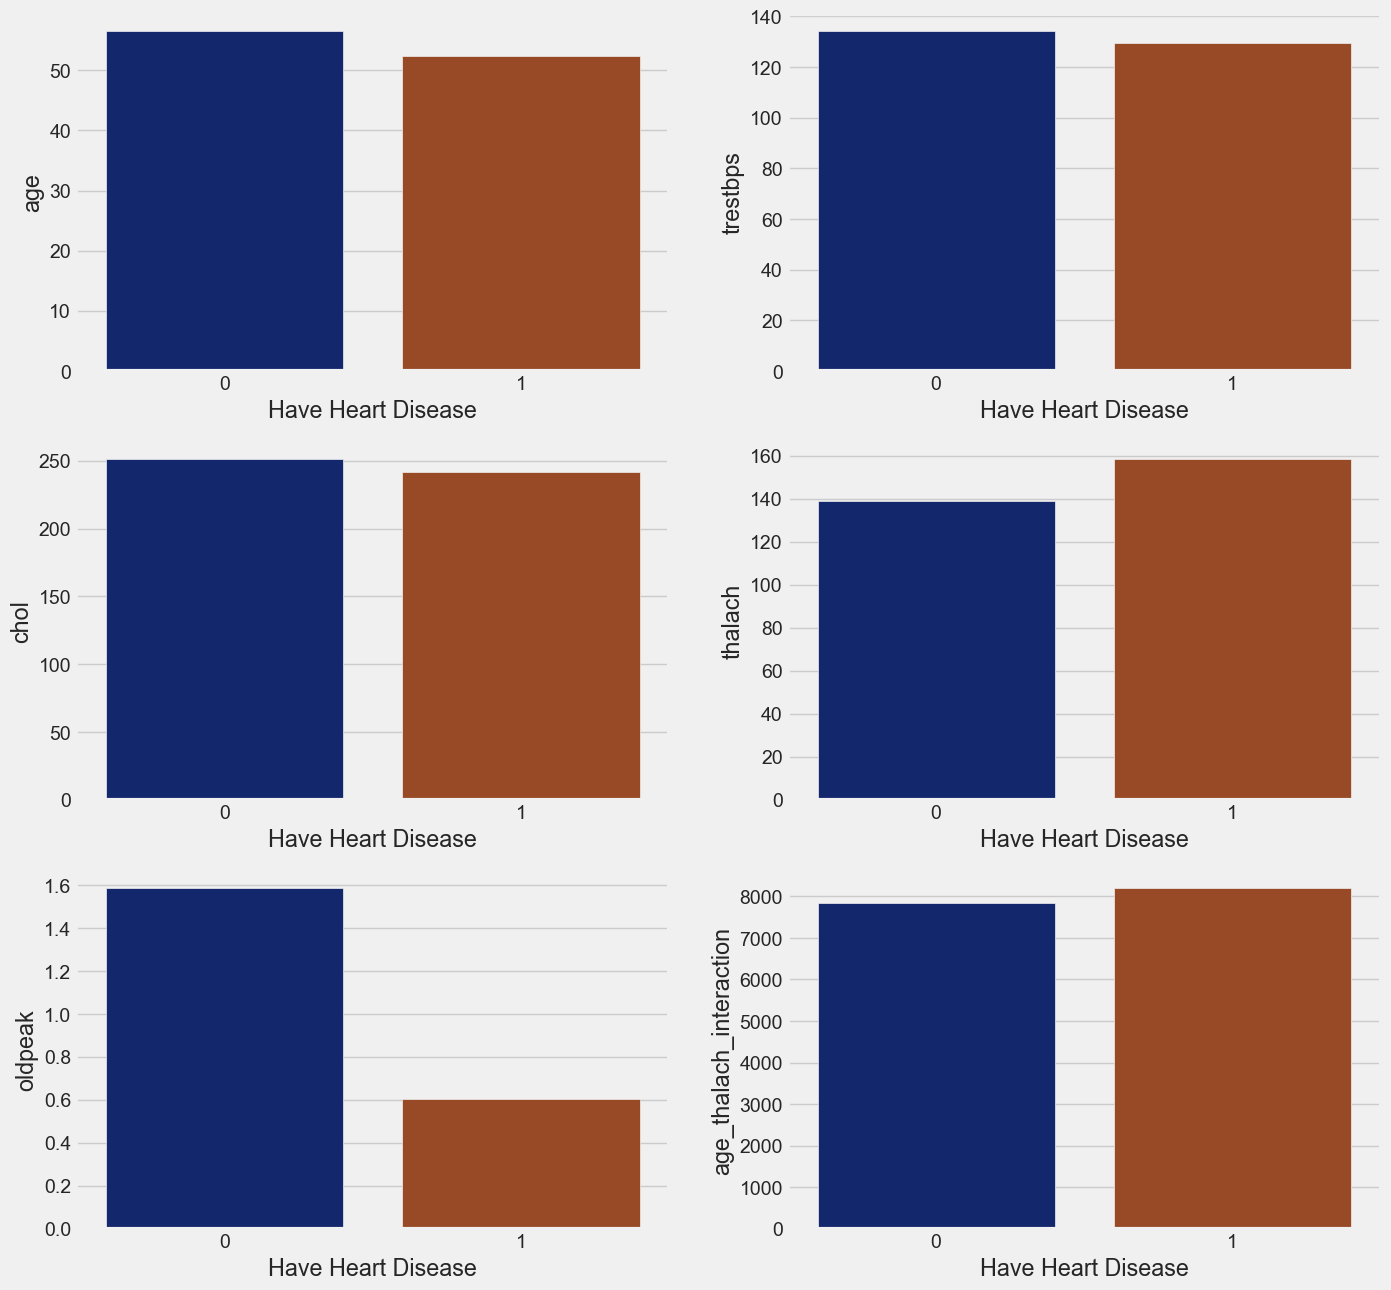


Missing values in the dataset:
age                        0
sex                        0
cp                         0
trestbps                   0
chol                       0
fbs                        0
restecg                    0
thalach                    0
exang                      0
oldpeak                    0
slope                      0
ca                         0
thal                       0
target                     0
age_thalach_interaction    0
dtype: int64


In [2]:
#Test

#Star #

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFECV
import time
# Record the start time
start_time = time.time()

# Read the data
data = pd.read_csv("heart_disease_data.csv")

# Create interaction term between 'age' and 'thalach'
data['age_thalach_interaction'] = data['age'] * data['thalach']
# Print the first few rows of the dataset to see the added interaction term
print("\nDataset with Interaction Term:")
print(data.head())

# EDA
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display information about the dataset
print("\nInformation about the dataset:")
print(data.info())

# Display the shape of the dataset
print("\nShape of the dataset:")
print(data.shape)

# Display descriptive statistics of the dataset
print("\nDescriptive statistics of the dataset:")
print(data.describe())

# Display the value counts of the target variable
print("\nValue counts of the target variable:")
print(data['target'].value_counts())

# Plot the distribution of the target variable
ratio = data['target'].value_counts()
labels = ratio.index[0], ratio.index[1]
sizes = [ratio.values[0], ratio.values[1]]

figure, axis = plt.subplots()
axis.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axis.axis('equal')
plt.title("Distribution of the target variable")
plt.show()

# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(data.isna().sum())

categorical_val = []
continuous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

# Plot bar charts for categorical features
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=column, hue='target', palette='dark', saturation=0.7)
    plt.xlabel(column)
    plt.legend(title='Have Heart Disease', labels=['NO', 'YES'])

plt.show()

# Plot bar charts for continuous features
plt.figure(figsize=(15, 15))
for i, column in enumerate(continuous_val, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=data, x='target', y=column, ci=None, palette='dark', saturation=0.7)
    plt.xlabel('Have Heart Disease')
    plt.ylabel(column)

plt.show()

# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(data.isna().sum())

# Preprocess data
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])
data = data.drop('exang', axis=1)  # Drop the 'exang' column
X = data.drop('target', axis=1)
y = data['target']

# Feature Selection using RFE with cross-validation
model = RidgeClassifier()
rfe = RFECV(model, step=1, cv=5)
X_selected = rfe.fit_transform(X, y)

# Split the selected features into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Record the start time
start_time = time.time()


In [4]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
ypred=classifier.predict(X_test)

accuracy1=accuracy_score(y_test,ypred)*100
print(accuracy1)

85.86956521739131


In [15]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [17]:
ypred2=classifier2.predict(X_test)
accuracy2=accuracy_score(y_test,ypred2)*100
print(accuracy2)

85.86956521739131


In [18]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf', random_state = 0)
classifier3.fit(X_train, y_train)

SVC(random_state=0)

In [22]:
ypred3=classifier3.predict(X_test)
accuracy3=accuracy_score(y_test,ypred3)*100
print(accuracy3)

69.56521739130434


In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [29]:
ypred4=classifier4.predict(X_test)
accuracy4=accuracy_score(y_test,ypred4)*100
print(accuracy4)

81.52173913043478


In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier5= RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier5.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [31]:
ypred5=classifier4.predict(X_test)
accuracy5=accuracy_score(y_test,ypred5)*100
print(accuracy5)

81.52173913043478
